#### Train the Neural Network for simulating OR gate functionality using batch training algorithm

Import the required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Declare input and target data

|input_1||input_2||target_output|
|-------||-------||-------------|
|0.1    || 0.1   ||0.1          |
|0.1    || 0.9   ||0.9          |
|0.9    || 0.1   ||0.9          |
|0.1    || 0.9   ||0.9          |

In [2]:
input_data=np.array([[1, 0.1, 0.1], [1, 0.1, 0.9], [1, 0.9, 0.1], [1, 0.9, 0.9]])
input_data

array([[1. , 0.1, 0.1],
       [1. , 0.1, 0.9],
       [1. , 0.9, 0.1],
       [1. , 0.9, 0.9]])

In [3]:
target_output=np.array([0.1, 0.9, 0.9, 0.9])
target_output

array([0.1, 0.9, 0.9, 0.9])

Define helper functions

In [4]:
def calculate_ouptut(predictors, weights):
    output=np.dot(weights, np.transpose(predictors))
    activation_output=1.0/(1+np.exp(-output))
    return activation_output

In [5]:
def plot_graph(iteration, yterm, ylabel):
    plt.plot(np.linspace(1,iteration, iteration), yterm, linewidth=2.0)
    plt.title("Epochs vs "+ylabel)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)

#### Batch training
In each epoch all the training samples are considered for changing the weights.

In [6]:
def batch_training(x, y, learning_rate=0.01, error_threshold=0.01, print_messages=True):
    np.random.seed(1)
    weights = np.random.rand(1,3)
    error=10000
    iteration=1
    error_in_iterations=[]
    weights_in_iterations=[]
    while(error>error_threshold):
        if print_messages:
            print("Iteration: ", iteration)
            print("================================")
            print("Weights: ", weights)
        output=calculate_ouptut(x, weights)
        if print_messages:
            print("Ouptut: ", output)
        error=np.sum(np.power((output-y), 2))
        error_in_iterations.append(error)
        if print_messages:
            print("Error: ", error)
            print("Debugging")
            print("=============================")
            print((y-output)*output*(1-output))
            print(np.dot((y-output)*output*(1-output), x))
        change_in_wt=-learning_rate*np.dot((y-output)*output*(1-output), x)
        weights=weights-change_in_wt
        weights_in_iterations.append(weights)
        iteration+=1
    if print_messages:
        print("Weights Converged!!!!", weights)
        print("Iteration Count:", iteration)
    return iteration-1, weights, \
           np.array(error_in_iterations), np.array(weights_in_iterations)

In [7]:
num_of_epochs, final_weights, errors_in_epoch, weights_in_epoch = \
batch_training(input_data,target_output,learning_rate=0.1, print_messages=False)

Number of epochs processed to converge are

In [8]:
num_of_epochs

11639

Final Weights obtained using batch training are

In [9]:
final_weights

array([[-3.0670391 ,  5.17978487,  5.17978397]])

Output calcualted using weights obtained are

In [10]:
print(calculate_ouptut(input_data, final_weights))

[[0.11597792 0.89213576 0.89213583 0.99808586]]


Plotting the line and Points using batch training

Text(0.5, 1.0, 'Plot of line seperating data points simulating OR gate')

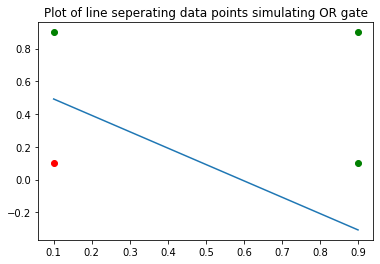

In [11]:
x_p=np.linspace(0.1,0.9,20)
y_p=-((final_weights[0][0]/final_weights[0][2])+ \
     ((final_weights[0][1]/final_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'go')
plt.plot(x_p,y_p)
plt.title("Plot of line seperating data points simulating OR gate")

#### Plots for Batch training process
Epochs vs Error

As the number of epochs increases, error will decrease. This is because training time with increase in number of iterations casuing to fit the model more effectively.

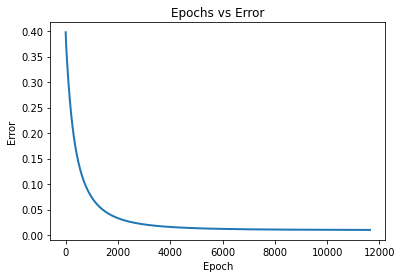

In [12]:
plot_graph(num_of_epochs, errors_in_epoch, "Error")

Epochs vs intermediate Weight_1's in each epoch

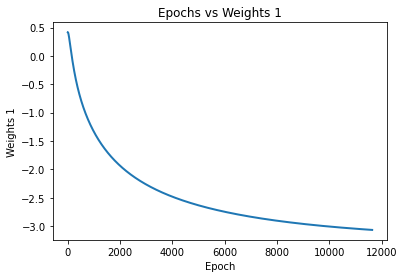

In [13]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,0], "Weights 1")

Epochs vs intermediate Weight_2's in each epoch

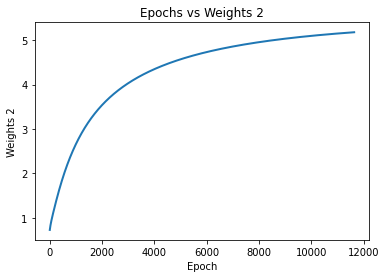

In [14]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,1], "Weights 2")

Epochs vs intermediate Weight_3's in each epoch

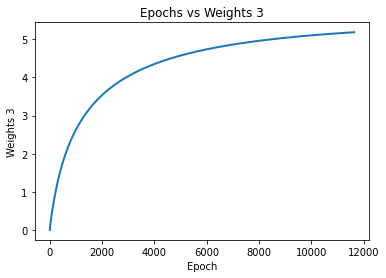

In [15]:
plot_graph(num_of_epochs, weights_in_epoch[:,0][:,2], "Weights 3")

Learning Rates vs Iteration:
As the learning rate decrease, number of itrations required for converging  increases as expected

In [16]:
def play_with_learning_rate(input_data, target_data, do_batch=True):
    iteration_per_rate=[]
    learning_rates=np.linspace(0.01, 1, 100)
    for lr_rate in learning_rates:
        if do_batch:
            iterations, final_weights, errors, weights= \
            batch_training(input_data,target_data, \
                           learning_rate=lr_rate, print_messages=False)
        else:
            iterations, final_weights, weights, errors= \
            online_training(input_data, target_data, epochs=1000000, \
                            learning_rate=lr_rate, print_messages=False)
        iteration_per_rate.append(iterations)
    plt.plot(np.array(iteration_per_rate), learning_rates)
    plt.title("Iterations vs Learning Rate")
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")

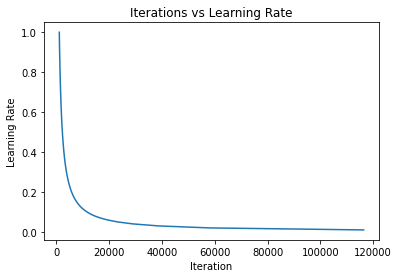

In [17]:
play_with_learning_rate(input_data, target_output)

#### Online Training
Instead of considering every training sample for updating weights, each data point is used to update them

In [18]:
def online_training(x, y, learning_rate=0.01, error_threshold=0.01, \
                    epochs=30000, print_messages=True):
    np.random.seed(1)
    online_weights=np.random.rand(1,3)
    iteration=1
    errors, weights = [],[]
    while iteration < epochs:
        error=0
        if print_messages:
            print("Iteration:", iteration)
            print("===================================")
        for x_i, y_i in zip(x,y):
            output_i=calculate_ouptut(x_i, online_weights)
            error=error + np.power((output_i-y_i), 2)
            change_in_wt_i=-learning_rate*(y_i-output_i)*output_i*(1-output_i)*x_i
            online_weights=online_weights-change_in_wt_i
        iteration+=1 
        errors.append(error)
        weights.append(online_weights)
        if print_messages:
            print("Weights:",online_weights)
            print("Output: ", calculate_ouptut(x, online_weights))
            print("Error:", error)
        if error < error_threshold:
            break
    return iteration-1, online_weights, np.array(weights), np.array(errors)

In [19]:
epochs, final_weights, weights_in_epoch, errors_in_epoch = \
online_training(input_data, target_output, learning_rate=0.1, print_messages=False)

Usually, number of epochs for weight convergence in online learning(stocastic gradient descet) will be less than in batch training. Number of epochs for convergence are

In [20]:
epochs

11629

Final weights obtained after online training are

In [21]:
final_weights

array([[-3.06711053,  5.17993986,  5.18008907]])

Output calcualted using obtained weights are

In [22]:
print(calculate_ouptut(input_data, final_weights))

[[0.11597531 0.8921568  0.89214532 0.99808652]]


Plot of points and obtained line using online training

Text(0.5, 1.0, 'Plot of line seperating data points simulating OR gate')

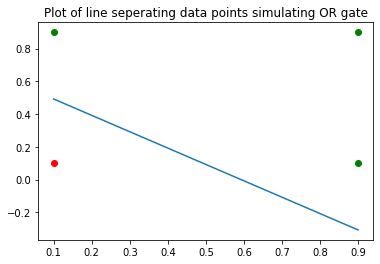

In [23]:
x_p=np.linspace(0.1,0.9,20)
y_p=-((final_weights[0][0]/final_weights[0][2])+ \
     ((final_weights[0][1]/final_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'go')
plt.plot(x_p,y_p)
plt.title("Plot of line seperating data points simulating OR gate")

#### Plots for Online training process

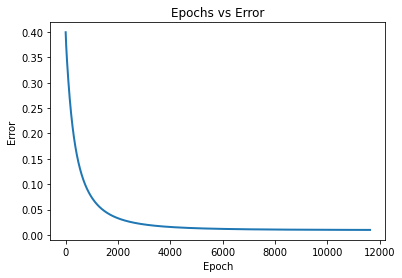

In [24]:
plot_graph(epochs, errors_in_epoch, "Error")

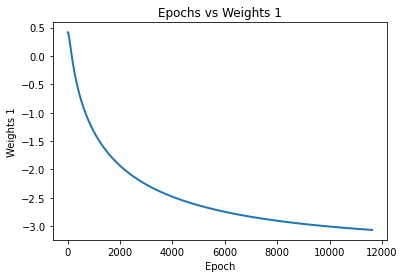

In [25]:
plot_graph(epochs, weights_in_epoch[:,0][:,0], "Weights 1")

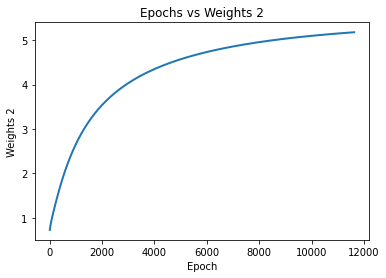

In [26]:
plot_graph(epochs, weights_in_epoch[:,0][:,1], "Weights 2")

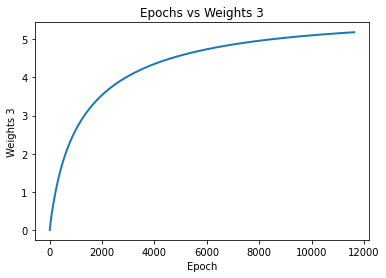

In [27]:
plot_graph(epochs, weights_in_epoch[:,0][:,2], "Weights 3")

Learning rates vs Iterations

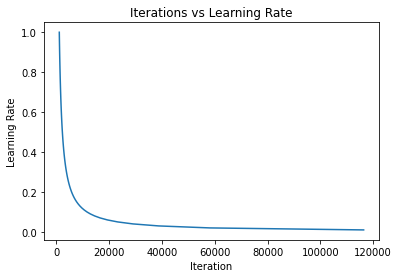

In [28]:
play_with_learning_rate(input_data, target_output, do_batch=False)